# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# Your code here. 
x_values=[17,51,27,21,36,48,19,26,54,30]
y_values=[10,1,5,9,4,2,9,6,0,3]
student_data = pd.DataFrame({'X': x_values, 'Y': y_values})

Draw a dispersion diagram (scatter plot) for the data.

Text(0, 0.5, 'Tardies')

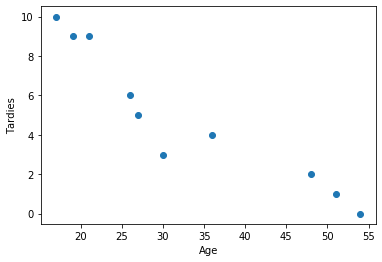

In [3]:
# Your code here.
plt.scatter(x_values,y_values)
plt.xlabel('Age')
plt.ylabel('Tardies')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# Your response here. 
'''
The scatter plot confirms the hypotesis: younger students are more unpunctual to class than older ones.
Negative linear correlation
'''

'\nThe scatter plot confirms the hypotesis: younger students are more unpunctual to class than older ones.\nNegative linear correlation\n'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.

# Linear correlation --> Pearson coeffiient
# Pearson correlation coefficient is a statistic that measures linear correlation between two variables X and Y
corr=student_data.corr()

# Covariance
# In probability theory and statistics, covariance is a measure of the joint variability of two random variables.
cov=student_data.cov() 

In [6]:
# Array --> cov.values (transform df in array)
cov.values[0][1]

-45.56666666666666

In [7]:
# Pandas
cov["Y"].loc["X"]

-45.56666666666666

In [8]:
'''
https://towardsdatascience.com/let-us-understand-the-correlation-matrix-and-covariance-matrix-d42e6b643c22#:~:text=In%20simple%20words%2C%20both%20the,linear%20relationship%20between%20two%20variables.
Both the terms measure the relationship and the dependency between two variables. 

“Covariance” indicates the direction of the linear relationship between two variables. 
“Correlation” measures both the strength and direction of the linear relationship between two variables. --> Function of covariance --> STANDARDIZED VALUES
'''

'\nhttps://towardsdatascience.com/let-us-understand-the-correlation-matrix-and-covariance-matrix-d42e6b643c22#:~:text=In%20simple%20words%2C%20both%20the,linear%20relationship%20between%20two%20variables.\nBoth the terms measure the relationship and the dependency between two variables. \n\n“Covariance” indicates the direction of the linear relationship between two variables. \n“Correlation” measures both the strength and direction of the linear relationship between two variables. --> Function of covariance --> STANDARDIZED VALUES\n'

In [9]:
X=student_data.X.std()
Y=student_data.Y.std()

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [11]:
# Your response here.
slope, intercept, r_value, p_value, std_err = stats.linregress(student_data.X, student_data.Y)
# outcome variable = dependent variable --> Tardies

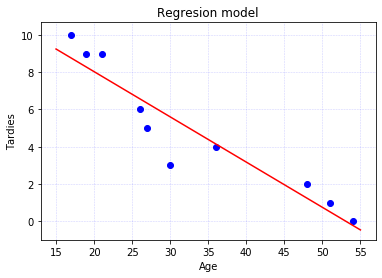

In [12]:
# Manual calculation of regression
fig, ax = plt.subplots(1, 1)
x = np.linspace(15,55,100)
y = slope*x+intercept
plt.plot(x, y, '-r')
plt.scatter(student_data['X'], student_data['Y'], color='blue')
plt.title('Regresion model')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.grid(color='b', alpha=0.2, linestyle='dashed', linewidth=0.5)

Plot your regression model on your scatter plot.

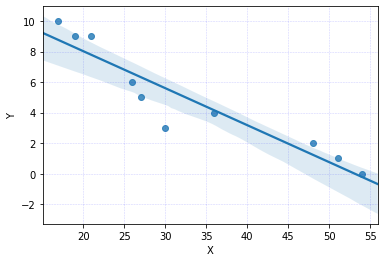

In [13]:
# Your code here.
sns.regplot(x ='X',y ='Y',data=student_data)
plt.grid(color='b', alpha=0.2, linestyle='dashed', linewidth=0.5)

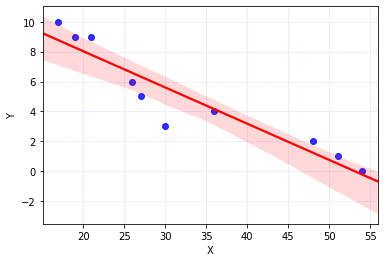

In [14]:
# Changing the color of the linear regression
ax = sns.regplot(x ='X',y ='Y',data=student_data,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.grid(color='b', alpha=0.2, linestyle='dashed', linewidth=0.5)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [15]:
# Your response here. 

print(f'Slope: {round(slope,2)}') #--> Negative correlation
print(f'Intercept: {round(intercept,2)}')
print(f'Regression coefficient: {round(r_value,2)}') #--> Negative correlation
print(f'Std: {round(std_err,2)}')

# Conclusions
# The age is a good predictor of the tardines (high negative correlation Pearson coefficient between Age-Tardiness(-0,94). 
# The std is very low --> it confirms that the linear regression is a good representation of the scatter plot

Slope: -0.24
Intercept: 12.89
Regression coefficient: -0.94
Std: 0.03


In [16]:
'''
Variance and covariance are mathematical terms frequently used in statistics and probability theory. 
Variance refers to the spread of a data set around its mean value, 
while a covariance refers to the measure of the directional relationship between two random variables.
'''

'\nVariance and covariance are mathematical terms frequently used in statistics and probability theory. \nVariance refers to the spread of a data set around its mean value, \nwhile a covariance refers to the measure of the directional relationship between two random variables.\n'

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [17]:
# Import any libraries you may need & the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [19]:
# Your response here. 
list_corr=['CO2 Emission Grams/Mile','Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']
vehicles_corr=vehicles[list_corr].corr()
vehicles_corr

,CO2 Emission Grams/Mile,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
CO2 Emission Grams/Mile,1.000000,-0.222300,0.752393,0.986189,-0.926229,0.930865
Year,-0.222300,1.000000,0.082469,-0.221084,0.204751,-0.091913
Cylinders,0.752393,0.082469,1.000000,0.739517,-0.698648,0.778153
Fuel Barrels/Year,0.986189,-0.221084,0.739517,1.000000,-0.909743,0.916208
Combined MPG,-0.926229,0.204751,-0.698648,-0.909743,1.000000,-0.875185
Fuel Cost/Year,0.930865,-0.091913,0.778153,0.916208,-0.875185,1.000000


In [60]:
# Different methods to find the correlation between two variables

In [20]:
vehicles[list_corr].corr()['CO2 Emission Grams/Mile']

CO2 Emission Grams/Mile    1.000000
Year                      -0.222300
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
Combined MPG              -0.926229
Fuel Cost/Year             0.930865
Name: CO2 Emission Grams/Mile, dtype: float64

In [21]:
vehicles[list_corr].corr().loc['CO2 Emission Grams/Mile']

CO2 Emission Grams/Mile    1.000000
Year                      -0.222300
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
Combined MPG              -0.926229
Fuel Cost/Year             0.930865
Name: CO2 Emission Grams/Mile, dtype: float64

In [22]:
abs(vehicles.corr().loc['CO2 Emission Grams/Mile']).sort_values()

Year                       0.222300
Cylinders                  0.752393
Engine Displacement        0.803520
City MPG                   0.894139
Combined MPG               0.926229
Highway MPG                0.926405
Fuel Cost/Year             0.930865
Fuel Barrels/Year          0.986189
CO2 Emission Grams/Mile    1.000000
Name: CO2 Emission Grams/Mile, dtype: float64

In [23]:
# Find the most important variables (Javi!)
abs(vehicles.corr().loc['CO2 Emission Grams/Mile']).sort_values()[-4:-1].index

Index(['Highway MPG', 'Fuel Cost/Year', 'Fuel Barrels/Year'], dtype='object')

In [24]:
# Creating a Df
vehicles[abs(vehicles.corr().loc['CO2 Emission Grams/Mile']).sort_values()[-4:-1].index]

,Highway MPG,Fuel Cost/Year,Fuel Barrels/Year
0,17,1950,19.388824
1,13,2550,25.354615
2,17,2100,20.600625
3,13,2550,25.354615
4,21,2550,20.600625
...,...,...,...
35947,38,1100,9.155833
35948,38,1100,9.155833
35949,38,1100,9.155833
35950,39,1100,9.155833


In [25]:
# Low correlation --> Cylinders/Year, Fuel Cost/Year/Year, Fuel Barrels/Year
# High correlation --> Positive (direct correlation) --> CO2 Emission Grams/Mile/Fuel Barrels/Year,CO2 Emission Grams/Mile/Fuel Cost/Year, Fuel Barrels/Year/Fuel Cost/Year
#                  --> Negative (inverse correlation) --> CO2 Emission Grams/Mile/Combined MPG, Fuel Barrels/Year/Combined MPG

# There is a strong positive correlation between CO2 Emission Grams/Mile, Fuel Barrels/Year, Fuel Cost/Year 
# (a correlation in which large values of one variable are associated with large values of the other and small with small)
# There is a strong negative correlation between CO2 Emission Grams/Mile,  Fuel Barrels/Year, Combined MPG
# (two variables move in opposite directions)

# Outcome variable --> CO2 Emission Grams/Mile
# The most important variable in determining CO2 emissions is: Fuel Barrels/Year (0.98)
# The most irrelevant variable is: Year

# Years have a very low correlations with all other variables (max +/- 0.22)--> I decide to eliminate it from the variables when fitting the model

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

#### Import libraries

In [26]:
# Your response here. 
from scipy import stats

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [31]:
X=vehicles[['Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']]

In [32]:
y=vehicles['CO2 Emission Grams/Mile']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)

In [34]:
# Model
lr= LinearRegression()

In [35]:
# Train
results=lr.fit(X_train,y_train)
results

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
# Evaluate
round(lr.score(X_train,y_train),3)

0.98

In [37]:
# Evaluate
round(lr.score(X_test,y_test),3)

0.981

In [38]:
# Correlaion coefficients
#
lr.coef_

array([ 1.28321507, 19.26049582, -3.41738375,  0.02931223])

In [39]:
# Check tne results!
lr.predict([[2,1,2,1]])

array([156.39076453])

In [40]:
abs(lr.coef_).sum()

23.990406869228384

In [41]:
# Formula that tells us the weight of the variables in absolute terms
abs(lr.coef_)/abs(lr.coef_).sum()

array([0.05348867, 0.80284157, 0.14244793, 0.00122183])

In [42]:
y_pred=lr.predict(X)
y_pred

array([519.00383257, 667.73124455, 550.15794792, ..., 230.78246621,
       230.78246621, 240.70391542])

In [43]:
# r2 indica cuanto es bueno el modelo
r2_score(y,y_pred)

0.9802620907087177

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [44]:
# Your response here.


## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [45]:
# Your code here. 
df =pd.DataFrame({'People':[1,3,4,6,8,9,11,14], 'Attendee':[1,2,4,4,5,7,8,13]})
df

,People,Attendee
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

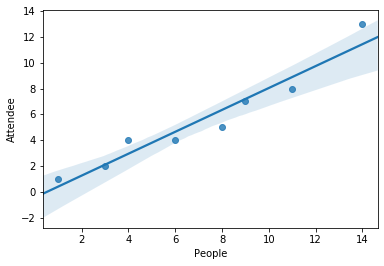

In [46]:
# Your code here.
sns.regplot(df.People,df.Attendee)

In [47]:
df.describe()

,People,Attendee
count,8.000000,8.000000
mean,7.000000,5.500000
std,4.342481,3.817254
min,1.000000,1.000000
25%,3.750000,3.500000
50%,7.000000,4.500000
75%,9.500000,7.250000
max,14.000000,13.000000


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [48]:
# Your response here. 
# Positive correlation

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [49]:
# Your response here. 
# Calculating the outliers
ix=df.Attendee.quantile(0.25)
ix

3.5

In [50]:
dx=df.Attendee.quantile(0.75)

In [51]:
iqr= 1.5*(dx-ix)
iqr

5.625

In [52]:
i= ix-iqr
i

-2.125

In [53]:
d= dx+iqr
d

12.875

In [54]:
# Dataframe without outliers
df1=df[(df['Attendee']>i) & (df['Attendee']<d)]

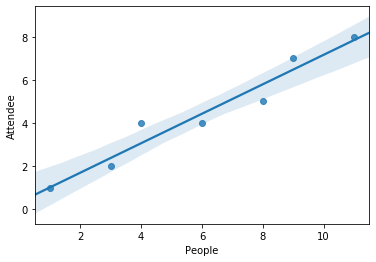

In [55]:
sns.regplot(df1.People,df1.Attendee)

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [56]:
# Your response here. 
df1.describe()

,People,Attendee
count,7.000000,7.000000
mean,6.000000,4.428571
std,3.559026,2.507133
min,1.000000,1.000000
25%,3.500000,3.000000
50%,6.000000,4.000000
75%,8.500000,6.000000
max,11.000000,8.000000


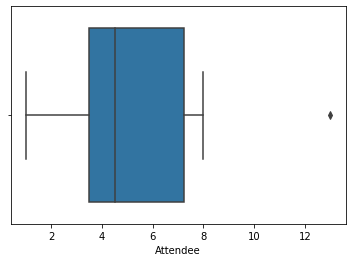

In [57]:
sns.boxplot(df.Attendee)

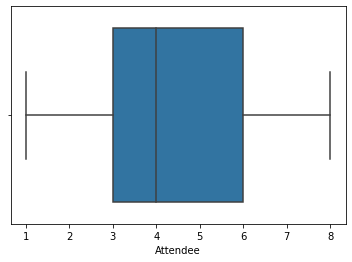

In [58]:
sns.boxplot(df1.Attendee)

In [59]:
# Few data to decide if the outliers affect the model 
# The outliers doesn't affect the regression model but without outliers we have a better model(
# --> std decreases+mean is more centered)